In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
%matplotlib inline

In [2]:
folder = './res/'
preffix = 'prelim-'

In [3]:
filenames = [filename for filename in os.listdir(folder) if filename.endswith('.csv')]

In [4]:
dfs = [pd.read_csv(folder+filename,index_col='time') for filename in filenames[1:3]]

In [5]:
biases = [-0.25, 0.0]
labels = [r'$b = '+str(b)+'$' for b in biases]

In [6]:
plt.style.use('seaborn-whitegrid')

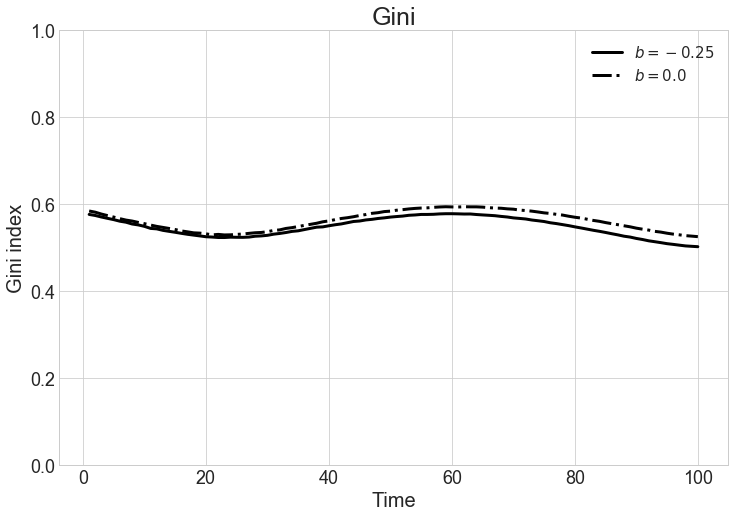

In [7]:
cycle = (cycler(color=['k']) * cycler(linestyle=['-','-.','--',':']))

fig, ax = plt.subplots(figsize=(12,8))

ax.set_title('Gini',fontsize=25)

ax.set_prop_cycle(cycle)

for df, lbl in zip(dfs,labels):
    ax.plot(df['gini'],label=lbl,lw=3.0)

_ = ax.set_xlabel('Time',fontsize=20)
_ = ax.set_ylabel('Gini index',fontsize=20)
_ = ax.set_ylim([0.0,1.0])
ax.tick_params(labelsize=18)
_ = ax.legend(prop={'size': 15})

fig.savefig(preffix+'gini.png')

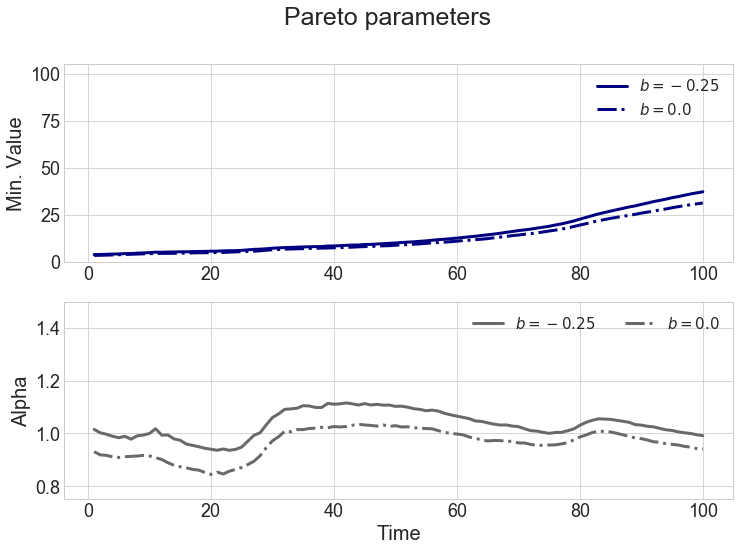

In [8]:
cycle = [(cycler(color=['navy']) * cycler(linestyle=['-','-.','--',':'])),
          (cycler(color=['dimgray']) * cycler(linestyle=['-','-.','--',':']))]

fig, ax = plt.subplots(nrows=2,figsize=(12,8))

ax[0].set_prop_cycle(cycle[0])
ax[1].set_prop_cycle(cycle[1])

fig.suptitle('Pareto parameters',fontsize=25)

for df, lbl in zip(dfs,labels):
    ax[0].plot(df['x_min'],label=lbl,lw=3.0)

    ax[1].plot(df['alpha'],label=lbl,lw=3.0)

_ = ax[0].set_ylabel('Min. Value',fontsize=20)
ax[0].set_ylim([0.0,105.0])
_ = ax[1].set_ylabel('Alpha',fontsize=20)
ax[1].set_ylim([0.75,1.50])
_ = ax[1].set_xlabel('Time',fontsize=20)
ax[0].tick_params(labelsize=18)
ax[1].tick_params(labelsize=18)

_ = ax[0].legend(prop={'size': 15})
_ = ax[1].legend(prop={'size': 15},ncol=2)

fig.savefig(preffix+'pareto.png')

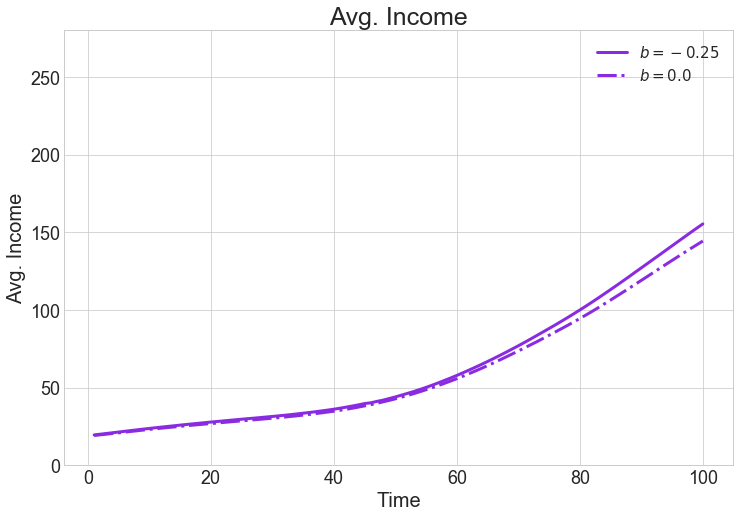

In [9]:
cycle = (cycler(color=['blueviolet']) * cycler(linestyle=['-','-.','--',':']))

fig, ax = plt.subplots(figsize=(12,8))

ax.set_title('Avg. Income',fontsize=25)

ax.set_prop_cycle(cycle)

for df,lbl in zip(dfs,labels):
    ax.plot(df['mean'],label=lbl,lw=3.0)

_ = ax.set_xlabel('Time',fontsize=20)
_ = ax.set_ylabel('Avg. Income',fontsize=20)
ax.set_ylim([0.0, 280.0])
_ = ax.legend(prop={'size': 15})
ax.tick_params(labelsize=18)

fig.savefig(preffix+'avg.png')

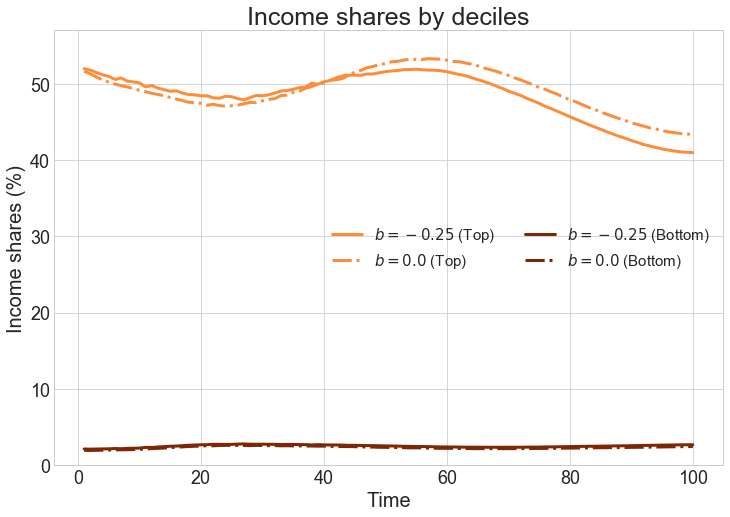

In [10]:
cycle = (cycler(color=[plt.cm.Oranges(0.5),plt.cm.Oranges(1.0)])*cycler(linestyle=['-','-.']))

fig, ax = plt.subplots(figsize=(12,8))

ax.set_title('Income shares by deciles',fontsize=25)

ax.set_prop_cycle(cycle)

for df, lbl in zip(dfs,labels):
    ax.plot(df['top']/df['gdp']*100.,label=lbl+' (Top)',lw=3.0)

for df,lbl in zip(dfs,labels):
    ax.plot(df['btm']/df['gdp']*100.,label=lbl+' (Bottom)',lw=3.0)

_ = ax.set_xlabel('Time',fontsize=20)
_ = ax.set_ylabel('Income shares (%)',fontsize=20)
ax.set_ylim([0.0,57.0])
ax.tick_params(labelsize=18)
_ = ax.legend(prop={'size': 15},ncol=2)

fig.savefig(preffix+'shares.png')